In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
df_2 = pd.read_csv('./data.csv',thousands=',')
venture_capital_15= pd.read_csv('./venture_capital.csv')
industry_growth=pd.read_csv('./industry_growth_2018.csv')

Get rid of punctuations,drop unwanted columns,change column names to lowercase

Categorize Data,Dummy sharks investments

In [16]:
df_2.head()

,Row,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Valuation,...,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,# Sharks,$ per shark,Details / Notes
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,"$50,000",55%,"$90,909",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,"$50,000",NaN
2,3.0,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,"$460,000",50%,"$920,000",...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2.0,"$230,000",NaN
3,4.0,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4,5.0,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [17]:
df_2.loc[df_2['Industry']=='Uncertain / Other'].head()

,Row,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Valuation,...,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,# Sharks,$ per shark,Details / Notes
5,6.0,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
43,44.0,1.0,10.0,The URO Club,Yes,Uncertain / Other,Male,"$25,000",70%,"$35,714",...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"$25,000",NaN
44,45.0,1.0,10.0,Jump Forward,Yes,Uncertain / Other,Male,"$600,000",50%,"$1,200,000",...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,2.0,"$300,000",NaN
93,94.0,2.0,8.0,HyConn,Yes,Uncertain / Other,Male,"$1,250,000",100%,"$1,250,000",...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,"$1,250,000",deal did not go through after show
152,153.0,3.0,13.0,Skyride,No,Uncertain / Other,Male,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [18]:
df_2.columns = df_2.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [19]:
df_2['equity'] = df_2["equity"].str.strip("%")

In [20]:
df_2 = df_2.rename(columns={'entrepreneur_gender':'gender'})

In [21]:
cols_to_drop =['row','no._in_series','#_sharks','$_per_shark', 'details_/_notes','company']
df_2 = df_2.drop(cols_to_drop,axis=1)

In [22]:
df_2.head()

,season,deal,industry,gender,amount,equity,valuation,corcoran,cuban,greiner,herjavec,john,o'leary,harrington,guest
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,Yes,Healthcare,Female,"$50,000",55,"$90,909",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,Yes,Food and Beverage,Male,"$460,000",50,"$920,000",1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,1.0,No,Business Services,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,No,Lifestyle / Home,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df_2['amount'] = df_2['amount'].str.replace(',', '')
df_2['amount'] = df_2['amount'].str.replace('$', '')
df_2['valuation'] = df_2['valuation'].str.replace(',', '')
df_2['valuation'] = df_2['valuation'].str.replace('$', '')

In [24]:
df_2['industry']= df_2['industry'].str.replace('/', '').str.replace(' ', '')

In [25]:
df_2.columns = df_2.columns.str.replace(r"[\"\',]", '')

In [88]:
df_2.head()

,season,deal,industry,gender,amount,equity,valuation,corcoran,cuban,greiner,herjavec,john,oleary,harrington,guest
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,Yes,Healthcare,Female,50000,55,90909,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,Yes,FoodandBeverage,Male,460000,50,920000,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,1.0,No,BusinessServices,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,No,LifestyleHome,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
df_2=df_2.drop(df_2.index[[0]])

In [90]:
df_2=df_2.fillna(value=0)

In [91]:
df_2.loc[df_2['industry']=='GreenCleanTech']

,season,deal,industry,gender,amount,equity,valuation,corcoran,cuban,greiner,herjavec,john,oleary,harrington,guest
64,1.0,No,GreenCleanTech,Mixed Team,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91,2.0,No,GreenCleanTech,Male,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144,3.0,No,GreenCleanTech,Male,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
247,4.0,No,GreenCleanTech,Male,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
289,5.0,Yes,GreenCleanTech,Male,150000,20,750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
290,5.0,Yes,GreenCleanTech,Male,400000,17,2352941,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
479,6.0,Yes,GreenCleanTech,Male,600000,35,1714286,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
484,6.0,Yes,GreenCleanTech,Male,5000000,50,10000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
494,6.0,Yes,GreenCleanTech,Male,300000,20,1500000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
import re

In [93]:
df_2.industry = df_2.industry.apply(lambda x: re.sub("([a-z])([A-Z])","\g<1> \g<2>", str(x))) 

In [94]:
col = ['valuation','amount','equity','cuban','corcoran','greiner','herjavec','john','oleary','harrington','guest']

In [95]:
for cols in col:
    df_2[cols]= pd.to_numeric(df_2[cols])

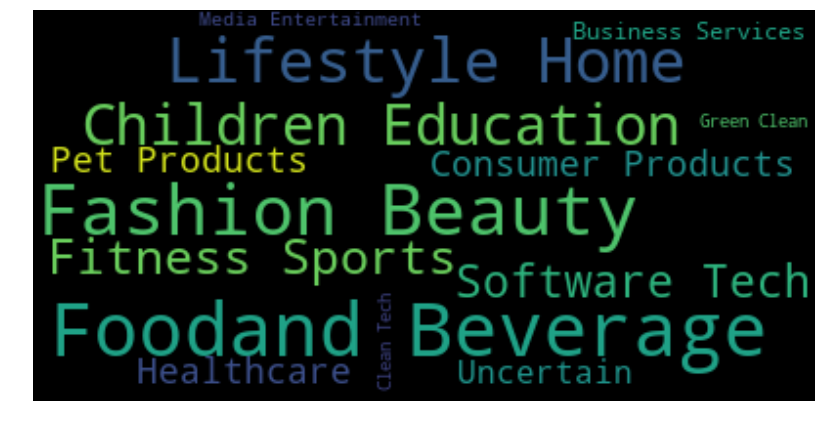

In [22]:
#from PIL import Image
from wordcloud import WordCloud
%matplotlib inline





wordcloud2 = WordCloud().generate(' '.join(df_2['industry']))
plt.figure(figsize = (14,8))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

# Contestants by Industry 

In [96]:
df_2.head()

,season,deal,industry,gender,amount,equity,valuation,corcoran,cuban,greiner,herjavec,john,oleary,harrington,guest
1,1.0,Yes,Healthcare,Female,50000,55.0,90909,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,Yes,Foodand Beverage,Male,460000,50.0,920000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,No,Business Services,Male,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,No,Lifestyle Home,Male,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,No,Uncertain Other,Male,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 0, 'count')

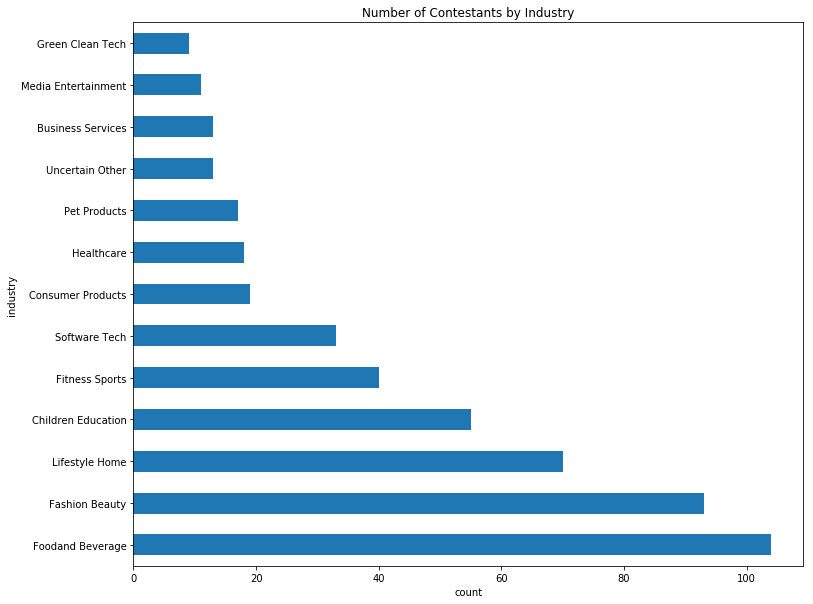

In [113]:
df_2.groupby('industry')['deal'].count().sort_values(ascending=False).plot(kind='barh',figsize=(12,10))
plt.title('Number of Contestants by Industry')
plt.xlabel('count')

# Number of Contestants that got deals by Industry

Text(0.5, 0, 'count')

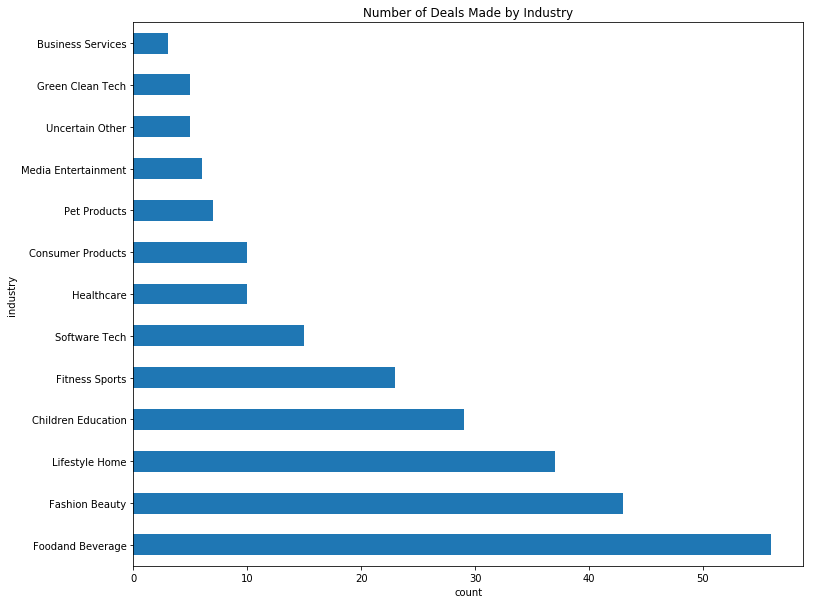

In [114]:
wins_df.groupby('industry')['deal'].count().sort_values(ascending=False).plot(kind='barh',figsize=(12,10))
plt.title('Number of Deals Made by Industry')
plt.xlabel('count')

# Investments by Gender 

In [23]:
wins_df = df_2[df_2['deal']!= 'No' ]

In [24]:
GENDER=pd.DataFrame(df_2.groupby('gender')['deal'].count().sort_values(ascending=False))

In [25]:
GENDER_WINS=pd.DataFrame(wins_df.groupby('gender')['deal'].count().sort_values(ascending=False))

In [26]:
GENDER_DF=pd.merge(GENDER,GENDER_WINS,on='gender')

In [27]:
GENDER_DF.columns=['contestants','funded']

In [28]:
GENDER_DF

,contestants,funded
gender,,
Male,295,142
Female,125,67
Mixed Team,75,40


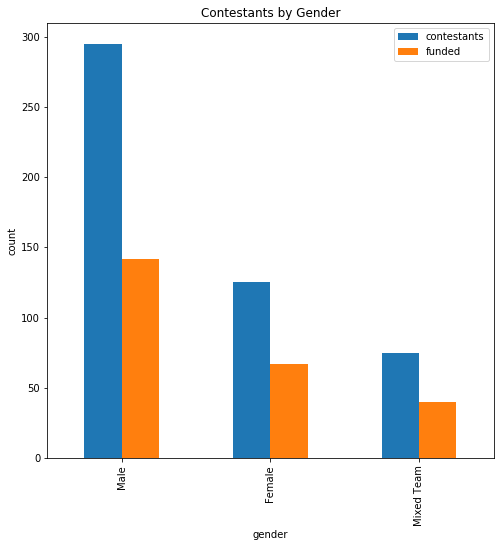

In [29]:
GENDER_DF.plot(kind='bar',figsize=(8,8))
plt.title('Contestants by Gender')
plt.ylabel('count');

# Delas Made By Season

In [30]:
season_deals = wins_df.groupby(['season'])[['cuban','corcoran','greiner','herjavec','john','oleary']].sum()

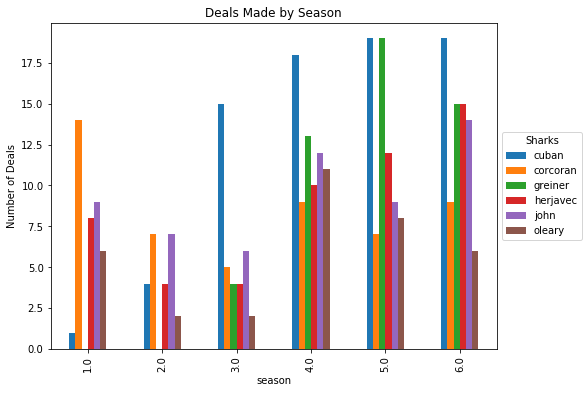

In [31]:
season_deals.plot(kind='bar',figsize=(8,6))
plt.ylabel('Number of Deals')
plt.title('Deals Made by Season')
plt.legend(season_deals, title="Sharks", loc="center left", bbox_to_anchor=(1, 0, 1, 1));

# Season 1 deals by Sharks

In [32]:
season_1=wins_df.loc[wins_df['season'] == 1]

In [33]:
wins_df.groupby(['season'])['deal'].count()

season
1.0    27
2.0    19
3.0    28
4.0    52
5.0    57
6.0    66
Name: deal, dtype: int64

In [34]:
season_1=season_1.groupby(['industry'])[['cuban','corcoran','greiner','herjavec','john','oleary']].sum()

In [35]:
#season_1 = season_1[season_1!= 0 ]

In [36]:
season_1

,cuban,corcoran,greiner,herjavec,john,oleary
industry,,,,,,
Children Education,1.0,3.0,0.0,1.0,2.0,1.0
Consumer Products,0.0,0.0,0.0,0.0,1.0,0.0
Fashion Beauty,0.0,2.0,0.0,1.0,3.0,0.0
Fitness Sports,0.0,1.0,0.0,0.0,0.0,0.0
Foodand Beverage,0.0,4.0,0.0,2.0,2.0,2.0
Healthcare,0.0,1.0,0.0,1.0,0.0,1.0
Lifestyle Home,0.0,1.0,0.0,1.0,0.0,0.0
Pet Products,0.0,1.0,0.0,0.0,1.0,0.0
Software Tech,0.0,1.0,0.0,1.0,0.0,1.0


Text(0.5, 1.0, 'Season 1 Sharks Investments by Industry')

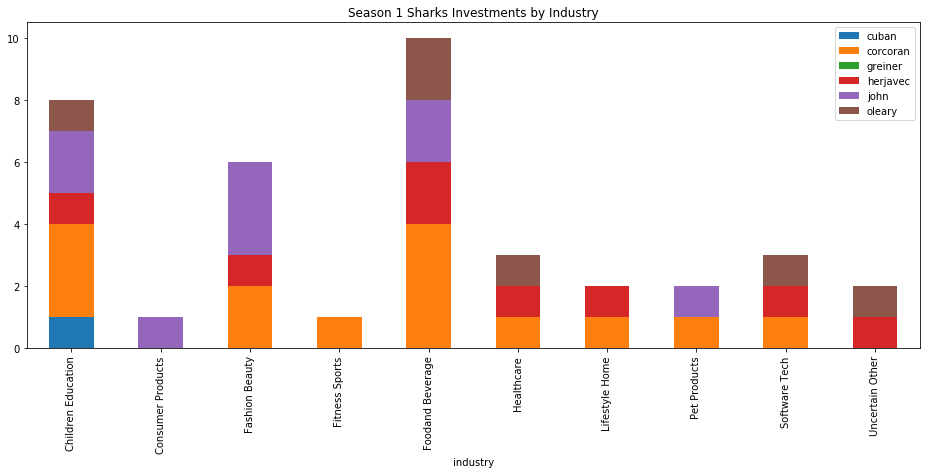

In [37]:
season_1.plot(kind='bar',figsize=(16,6),stacked=True)
plt.title('Season 1 Sharks Investments by Industry')

# Season 3 Deals 

In [118]:
season_3=wins_df.loc[wins_df['season'] == 3]

In [119]:
season_3=season_3.groupby(['industry'])[['cuban','corcoran','greiner','herjavec','john','oleary']].sum()

Text(0.5, 1.0, 'Season 3 Number ofSharks Investments by Industry')

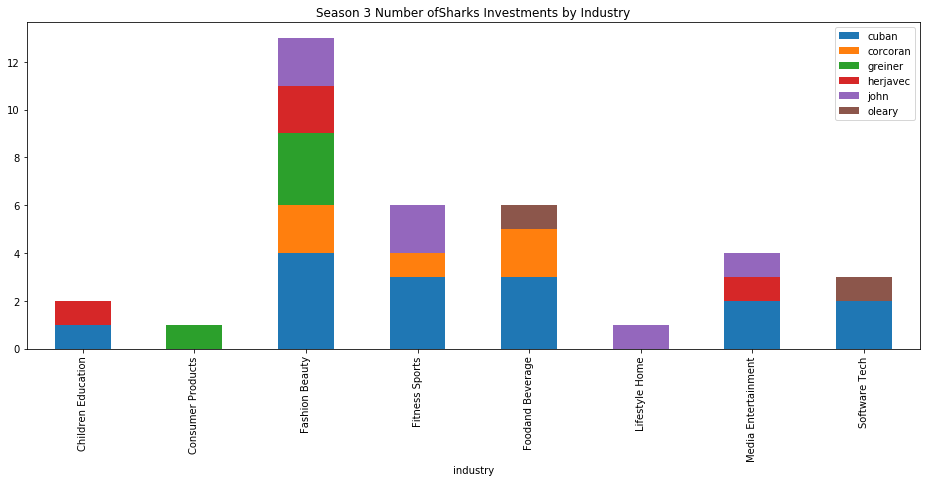

In [120]:
season_3.plot(kind='bar',figsize=(16,6),stacked=True)
plt.title('Season 3 Number ofSharks Investments by Industry')

In [41]:
season_1

,cuban,corcoran,greiner,herjavec,john,oleary
industry,,,,,,
Children Education,1.0,3.0,0.0,1.0,2.0,1.0
Consumer Products,0.0,0.0,0.0,0.0,1.0,0.0
Fashion Beauty,0.0,2.0,0.0,1.0,3.0,0.0
Fitness Sports,0.0,1.0,0.0,0.0,0.0,0.0
Foodand Beverage,0.0,4.0,0.0,2.0,2.0,2.0
Healthcare,0.0,1.0,0.0,1.0,0.0,1.0
Lifestyle Home,0.0,1.0,0.0,1.0,0.0,0.0
Pet Products,0.0,1.0,0.0,0.0,1.0,0.0
Software Tech,0.0,1.0,0.0,1.0,0.0,1.0


# Number of companies catagorized under Uncertain Other

In [121]:
wins_df.loc[wins_df['industry']=='Uncertain Other']

,season,deal,industry,gender,amount,equity,valuation,corcoran,cuban,greiner,herjavec,john,oleary,harrington,guest
43,1.0,Yes,Uncertain Other,Male,25000,70.0,35714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
44,1.0,Yes,Uncertain Other,Male,600000,50.0,1200000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
93,2.0,Yes,Uncertain Other,Male,1250000,100.0,1250000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
192,4.0,Yes,Uncertain Other,Male,150000,30.0,500000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
477,6.0,Yes,Uncertain Other,Male,500000,12.0,4166667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
season_6=wins_df.loc[wins_df['season'] == 6]

In [123]:
season_6=season_6.groupby(['industry'])[['cuban','corcoran','greiner','herjavec','john','oleary']].sum()

Text(0.5, 1.0, 'Season 6 Number of Sharks Investments by Industry')

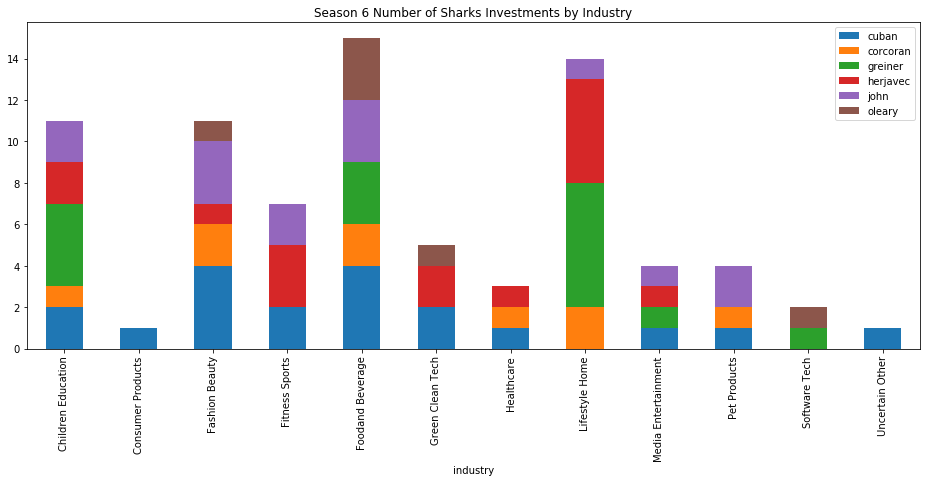

In [124]:
season_6.plot(kind='bar',figsize=(16,6),stacked=True)
plt.title('Season 6 Number of Sharks Investments by Industry')

# AVG AMOUNT,AVG VALUATION INVESTED BY INDUSTRY

In [46]:
industry_valuation=wins_df.groupby('industry', as_index=False)[['amount','valuation']].mean()

In [47]:
industry_valuation=industry_valuation.rename(columns={'amount':'avg_amount','valuation':'avg_valuation'})

In [48]:
industry_valuation['avg_amount']=industry_valuation['avg_amount'].map('{:,.2f}'.format)
industry_valuation['avg_valuation']=industry_valuation['avg_valuation'].map('{:,.2f}'.format)

In [49]:
industry_valuation.style.highlight_max()

,industry,avg_amount,avg_valuation
0,Business Services,"225,000.00","800,000.00"
1,Children Education,"137,413.79","851,671.86"
2,Consumer Products,"211,000.00","718,747.90"
3,Fashion Beauty,"206,860.47","847,519.98"
4,Fitness Sports,"305,869.57","1,283,666.91"
5,Foodand Beverage,"242,589.29","1,369,139.54"
6,Green Clean Tech,"1,290,000.00","3,263,445.40"
7,Healthcare,"538,000.00","1,990,193.80"
8,Lifestyle Home,"181,081.08","956,306.35"
9,Media Entertainment,"666,666.67","5,377,976.17"


# CALCULATING SHARKS INVESTMENT PERCENTAGE BY INDUSTRY

In [51]:
industry_avg=wins_df.groupby(['industry'])[['cuban','corcoran','greiner','herjavec','john','oleary']].sum()

In [52]:
industry_avg['cuban'] = (industry_avg.cuban * 100 / industry_avg.cuban.sum()).round(1).astype(str)+ '%' 
industry_avg['corcoran'] = (industry_avg.corcoran * 100 / industry_avg.corcoran.sum()).round(1).astype(str)+ '%'
industry_avg['greiner'] = (industry_avg.greiner * 100 / industry_avg.greiner.sum()).round(1).astype(str)+ '%'
industry_avg['herjavec'] = (industry_avg.herjavec * 100 / industry_avg.herjavec.sum()).round(1).astype(str)+ '%'
industry_avg['john'] = (industry_avg.john * 100 / industry_avg.john.sum()).round(1).astype(str)+ '%'
industry_avg['oleary'] = (industry_avg.oleary * 100 / industry_avg.oleary.sum()).round(1).astype(str)+ '%'

In [53]:
industry_avg.style.highlight_max()

,cuban,corcoran,greiner,herjavec,john,oleary
industry,,,,,,
Business Services,1.3%,0.0%,0.0%,1.9%,0.0%,8.6%
Children Education,10.5%,9.8%,15.7%,13.2%,10.5%,11.4%
Consumer Products,2.6%,5.9%,3.9%,3.8%,7.0%,0.0%
Fashion Beauty,17.1%,17.6%,15.7%,15.1%,28.1%,5.7%
Fitness Sports,13.2%,7.8%,0.0%,13.2%,8.8%,2.9%
Foodand Beverage,25.0%,33.3%,15.7%,13.2%,15.8%,31.4%
Green Clean Tech,2.6%,0.0%,2.0%,3.8%,0.0%,2.9%
Healthcare,5.3%,5.9%,3.9%,7.5%,3.5%,8.6%
Lifestyle Home,5.3%,9.8%,33.3%,17.0%,12.3%,8.6%


# AVG VALUATION AND AVG AMOUNT INVESTED BY SEASON

In [55]:
df_2.groupby('season', as_index=False)[['deal','amount','valuation']].mean()

,season,amount,valuation
0,1.0,76406.250000,1.938206e+05
1,2.0,110555.555556,2.807209e+05
2,3.0,80916.666667,2.651637e+05
3,4.0,92174.757282,3.616415e+05
4,5.0,134655.172414,7.104252e+05
5,6.0,226250.000000,1.274218e+06


In [56]:
season_avg = wins_df.groupby('season', as_index=False)[['amount','valuation']].mean()

In [57]:
season_avg['amount']=season_avg['amount'].map('{:,.2f}'.format)
season_avg['valuation']=season_avg['valuation'].map('{:,.2f}'.format)

In [58]:
season_avg.columns

Index(['season', 'amount', 'valuation'], dtype='object')

In [59]:
season_avg=season_avg.rename(columns={'amount':'avg_amount','valuation':'avg_valuation'})

In [60]:
season_avg

,season,avg_amount,avg_valuation
0,1.0,"181,111.11","459,426.52"
1,2.0,"209,473.68","531,892.21"
2,3.0,"173,392.86","568,207.82"
3,4.0,"182,576.92","716,328.38"
4,5.0,"274,035.09","1,445,777.61"
5,6.0,"397,651.52","2,239,535.32"


# Sharks investment percenatges by Gender

In [61]:
gender=wins_df.groupby('gender')['corcoran', 'cuban', 'greiner',
       'herjavec', 'john', 'oleary'].sum()

In [62]:
gender = gender.T

In [63]:
gender['Total']=gender['Female']+gender['Male']+gender['Mixed Team']

In [64]:
gender

gender,Female,Male,Mixed Team,Total
corcoran,24.0,19.0,8.0,51.0
cuban,20.0,43.0,13.0,76.0
greiner,15.0,27.0,9.0,51.0
herjavec,7.0,39.0,7.0,53.0
john,15.0,34.0,8.0,57.0
oleary,7.0,22.0,6.0,35.0


In [65]:
gender['female_percentile']= gender['Female']/gender['Total']*100
gender['male_percentile']= gender['Male']/gender['Total']*100
gender['mixed_team_perentile']= gender['Mixed Team']/gender['Total']*100

In [66]:
columns_to_drop=['Female', 'Male', 'Mixed Team','Total','mixed_team_perentile']
gender= gender.drop(columns_to_drop,axis=1)

In [67]:
gender

gender,female_percentile,male_percentile
corcoran,47.058824,37.254902
cuban,26.315789,56.578947
greiner,29.411765,52.941176
herjavec,13.207547,73.584906
john,26.315789,59.649123
oleary,20.000000,62.857143


In [68]:
gender = gender.rename(columns={'female_percentile': 'female', 'male_percentile': 'male'})

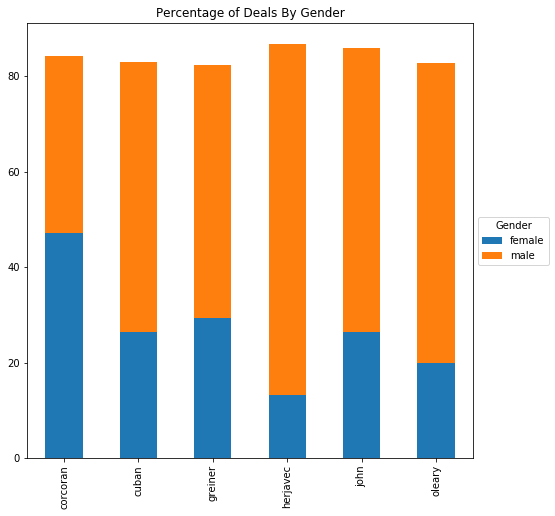

In [69]:
gender.plot(kind='bar',figsize=(8,8),stacked=True)
plt.legend(gender, title="Gender", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Percentage of Deals By Gender');

In [70]:
gender_industry=wins_df.groupby(['industry','gender']).size().unstack(level=1, fill_value=0)

In [71]:
gender_industry=gender_industry.rename(columns={'Mixed Team':'MixedTeam'})

In [72]:
gender_industry['Female'] = (gender_industry.Female * 100 / gender_industry.Female.sum()).round(1).astype(str) + '%'
gender_industry['Male'] = (gender_industry.Male * 100 / gender_industry.Male.sum()).round(1).astype(str) + '%'
gender_industry['MixedTeam'] = (gender_industry.MixedTeam * 100 / gender_industry.MixedTeam.sum()).round(1).astype(str) + '%'


In [73]:
gender_industry

gender,Female,Male,MixedTeam
industry,,,
Business Services,0.0%,1.4%,2.5%
Children Education,20.9%,6.3%,15.0%
Consumer Products,1.5%,4.2%,7.5%
Fashion Beauty,26.9%,13.4%,15.0%
Fitness Sports,6.0%,12.7%,2.5%
Foodand Beverage,22.4%,21.1%,27.5%
Green Clean Tech,0.0%,3.5%,0.0%
Healthcare,3.0%,4.9%,2.5%
Lifestyle Home,9.0%,16.9%,17.5%


# Venture Capital Investments 2015

In [127]:
venture_columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4']
venture_capital_15=venture_capital_15.drop(venture_columns,axis=1)

In [128]:
df_2.industry.value_counts()

Foodand Beverage       104
Fashion Beauty          93
Lifestyle Home          70
Children Education      55
Fitness Sports          40
Software Tech           33
Consumer Products       19
Healthcare              18
Pet Products            17
Business Services       13
Uncertain Other         13
Media Entertainment     11
Green Clean Tech         9
Name: industry, dtype: int64

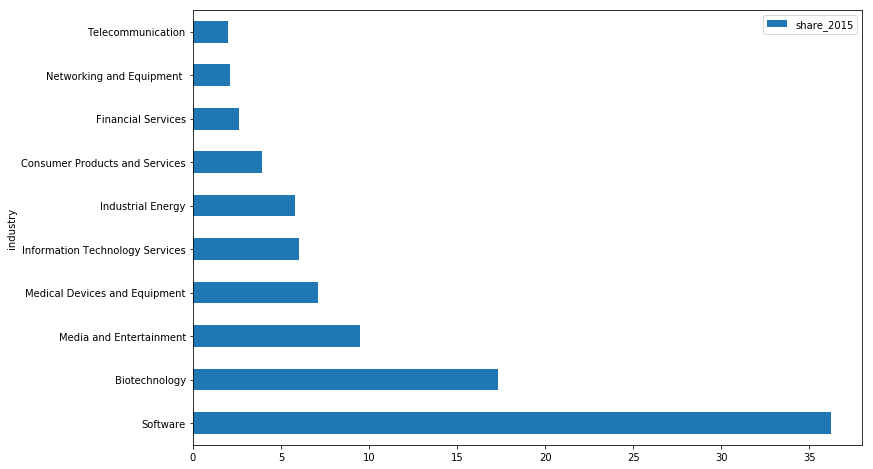

In [129]:
venture_capital_15.plot(kind='barh',x='industry',figsize=(12,8));

# Industry Statistics & Market Size 2018

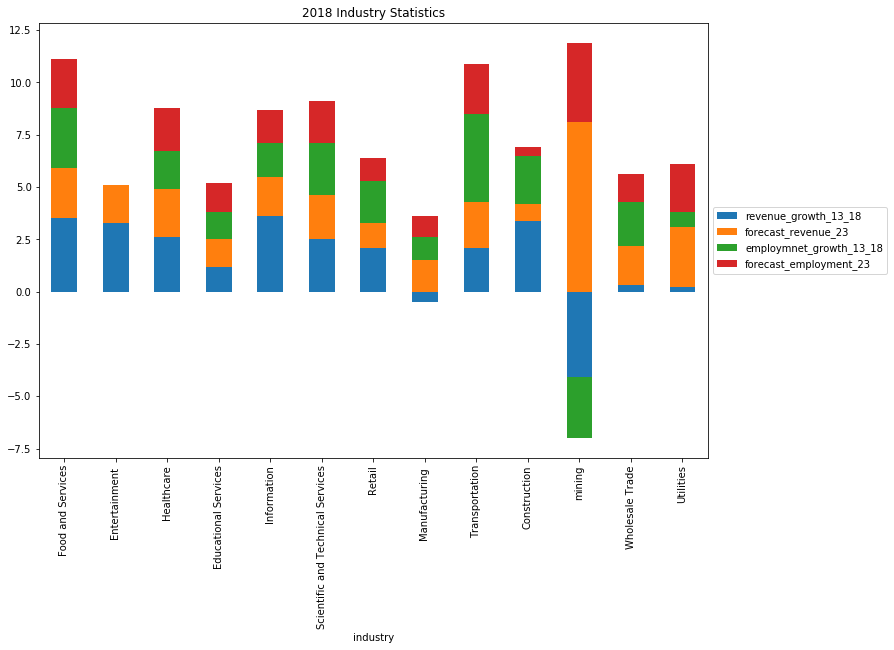

In [130]:
industry_growth.plot(kind='bar',x='industry',stacked=True,figsize=(12,8))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('2018 Industry Statistics');

In [131]:
col = ['valuation','amount','equity','cuban','corcoran','greiner','herjavec','john','oleary','harrington','guest']


In [132]:
investor_cols =['amount','cuban','corcoran','greiner','herjavec','john','oleary','harrington','guest']

In [133]:
for cols in col:
    df_2[cols]= pd.to_numeric(df_2[cols])

In [134]:
for cols in col:
    wins_df[cols]= pd.to_numeric(wins_df[cols])

# Sharks investments by industry

In [135]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# sns.set(rc={'figure.figsize':(12,10)}, font_scale=1)
# plt.figure(figsize = (12,10))

# sns.heatmap(corrs,cmap='coolwarm', annot=True)
# # Decorations
# plt.title('Investors & Industries', fontsize=22)
# plt.xlabel('Sharks')
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.show()

In [136]:
investor_wins=wins_df.groupby(['industry'])[['cuban','corcoran','greiner','herjavec','john','oleary']].corr()

In [140]:
investor_wins=investor_wins.fillna(value=0)

# Industry Vs Investor Buy Ins

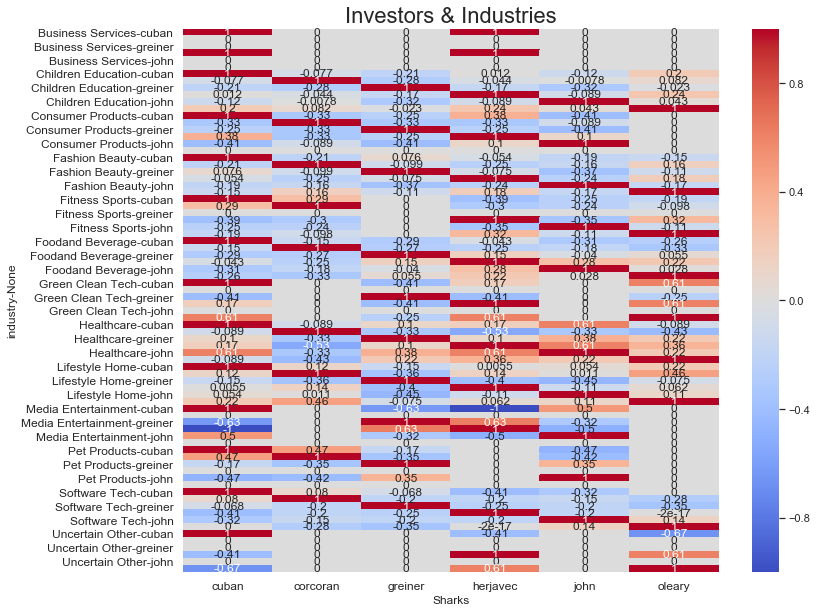

In [142]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={'figure.figsize':(12,10)}, font_scale=1)
plt.figure(figsize = (12,10))

sns.heatmap(investor_wins,cmap='coolwarm', annot=True)
# Decorations
plt.title('Investors & Industries', fontsize=22)
plt.xlabel('Sharks')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Largest investmnets made by sharks 

In [146]:
money_deals =pd.DataFrame(wins_df.groupby(['amount','industry'])[['cuban','corcoran','greiner','herjavec','john','oleary']].sum())

In [147]:
money_deals=money_deals.reset_index()

In [148]:
big_money_deals=money_deals.loc[money_deals['amount'] > 500000]

In [149]:
big_money_deals['amount']=big_money_deals['amount'].map('{:,.2f}'.format)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


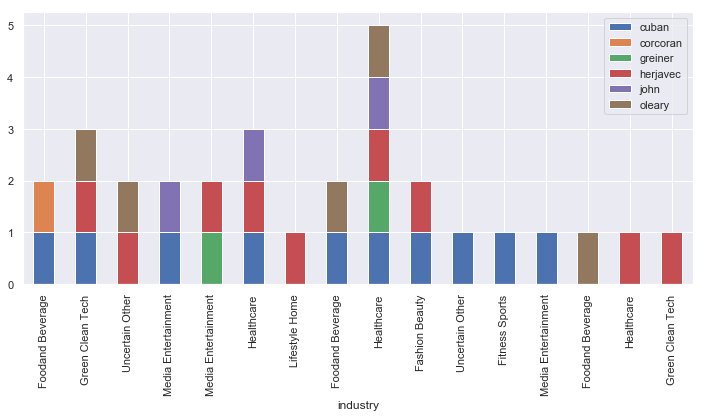

In [154]:
big_money_deals.plot(x='industry',kind='bar',stacked=True,figsize=(12,5))

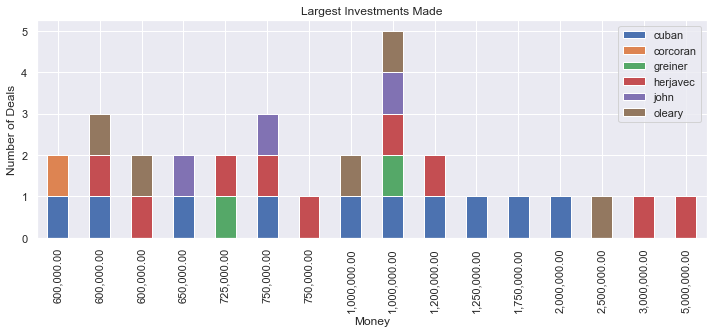

In [155]:
big_money_deals.plot(x='amount',kind='bar',stacked=True,figsize=(12,4))
plt.title('Largest Investments Made')
plt.ylabel('Number of Deals')
plt.xlabel('Money');

# Equity and Valuation For Largest Investments

In [156]:
gm_df=pd.DataFrame(wins_df.groupby(['amount'])[['equity','valuation','cuban','corcoran','greiner','herjavec','john','oleary']].sum())

In [157]:
gm_df=gm_df.reset_index()

In [158]:
gm_df.loc[gm_df['amount'] >= 1200000]

,amount,equity,valuation,cuban,corcoran,greiner,herjavec,john,oleary
38,1200000,20.0,6000000,1.0,0.0,0.0,1.0,0.0,0.0
39,1250000,100.0,1250000,1.0,0.0,0.0,0.0,0.0,0.0
40,1750000,25.0,7000000,1.0,0.0,0.0,0.0,0.0,0.0
41,2000000,20.0,10000000,1.0,0.0,0.0,0.0,0.0,0.0
42,2500000,10.0,25000000,0.0,0.0,0.0,0.0,0.0,1.0
43,3000000,25.0,12000000,0.0,0.0,0.0,1.0,0.0,0.0
44,5000000,50.0,10000000,0.0,0.0,0.0,1.0,0.0,0.0
